This Jupyter Notebook is designed to analyze and detect onset times in time series data, specifically for drum signals. Here's a high-level overview of the code:

1. **Imports and Setup**:
   - Imports necessary libraries: `pandas`, `numpy`, `matplotlib.pyplot`, and `os`.
   - Defines paths and identifiers for raw data files.

2. **Data Import**:
   - Defines a function `import_data` to read data from a specified file path and assign appropriate column names.
   - Loads data for a specific participant and trial using the `import_data` function.

3. **Onset Detection**:
   - Defines a function `onset_detection` to detect the onset of a signal based on a threshold and minimal interval between onsets.
   - Applies the `onset_detection` function to the 'Hi-hat' column of the data and plots the detected onsets.

4. **Onset Time Extraction**:
   - Defines a function `extract_onset_time` to extract onset times from a specified column in the data.
   - Extracts onset times for both 'Hi-hat' and 'Hi-hat (cue)' columns and plots the results.

5. **Onset Time Comparison**:
   - Defines a function `find_nearest_onset_time` to find the nearest onset time in the reference onset times for each target onset time and calculate the time differences.
   - Finds the nearest onset times and time differences between 'Hi-hat' and 'Hi-hat (cue)' onsets.
   - Plots the time differences between the target and reference onset times.

The notebook includes visualizations to help understand the onset detection and comparison results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [1]:
raw_data_path = "../../data/raw_20241030/output_txt/"
participant_ids = ["datahayase1030", "datahosokawa1030", "datasawada1030", "datasugata1030"]
trial_ids = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

# import data

In [3]:
def import_data(file_path):
    """
    Import data from a file and add appropriate column names.

    Parameters:
    - file_path (str): Path to the data file.

    Returns:
    - pd.DataFrame: DataFrame with the data and appropriate column names.
    """
    # Define column names based on the context
    column_names = [
        "Time", 
        "Hi-hat", 
        "Snare drum", 
        "Hi-hat (cue)", 
        "Snare (cue)", 
        "EMG (right 1)", 
        "EMG (right 2)", 
        "EMG (left 1)", 
        "EMG (left 2)"
    ]

    # Load the dataset with the defined column names
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)
    return data

iTrial = 9
iParticipant = 0
file_path = os.path.join(raw_data_path, f"{participant_ids[iParticipant]}_{trial_ids[iTrial]}.txt")
data = import_data(file_path)
data.head()

,Time,Hi-hat,Snare drum,Hi-hat (cue),Snare (cue),EMG (right 1),EMG (right 2),EMG (left 1),EMG (left 2)
0,0.0000,-0.000155,-0.000648,0,0,-0.009091,0.007017,0.003237,0.005538
1,0.0001,0.000174,0.000174,0,0,-0.006461,0.006689,0.002579,0.006524
2,0.0002,-0.000648,-0.000155,0,0,-0.003996,0.006195,0.000278,0.007017
3,0.0003,-0.000155,0.000339,0,0,-0.001859,0.005538,0.000278,0.006853
4,0.0004,0.000174,-0.000155,0,0,-0.000380,0.005374,-0.000051,0.006853


# Detect onset time of the signal

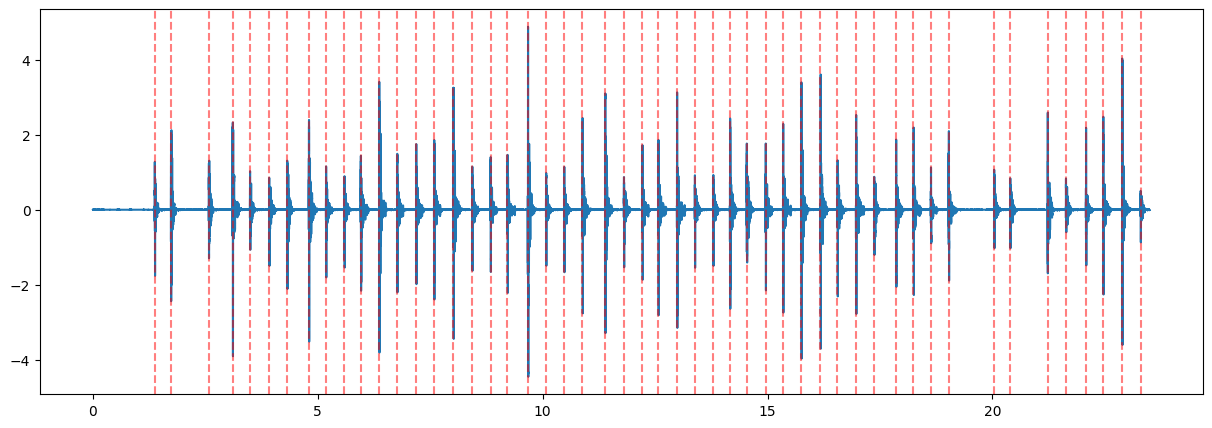

In [4]:
def onset_detection(timeSeries, threshold=0.5, minimal_interval=100):
    """
    Detect the onset of a signal based on a threshold.

    Parameters:
    - timeSeries Time series data.
    - threshold (float): Threshold value for the onset detection.
    - minimal_interval (int): Minimal interval between two onsets.

    Returns:
    - pd.Series: Time series data with onset detection.
    """
    # Initialize the onset detection
    onset = False
    onset_time = 0
    onsets = []
    
    # absolute value of the time series
    timeSeries = np.abs(timeSeries)
    
    # normalize the time series between 0 and 1
    timeSeries = (timeSeries - timeSeries.min()) / (timeSeries.max() - timeSeries.min())

    # Iterate through the time series data
    for i in range(len(timeSeries)):
        # Check if the current value is above the threshold
        if timeSeries[i] > threshold:
            # Check if there is no onset detected or the minimal interval is passed
            if not onset or i - onset_time > minimal_interval:
                onset = True
                onset_time = i
                onsets.append(1)
            else:
                onsets.append(0)
        else:
            onsets.append(0)
            
    # conver to index of the time series use numpy
    onsets = np.array(onsets)
    onset_idx = np.where(onsets == 1)[0]
    
    return onsets, onset_idx

onsets, onset_idx = onset_detection(data['Hi-hat'], threshold=0.1, minimal_interval=1000)
onset_time = data['Time'][onset_idx].values

# plot data
plt.figure(figsize=(15, 5)) 
plt.plot(data['Time'], data['Hi-hat'], label='Hi-hat')

# plot onset use vertical line
for i in range(len(onset_time)):
    plt.axvline(x=onset_time[i], color='red', linestyle='--', alpha=0.5)

# Extract onset time of the signal

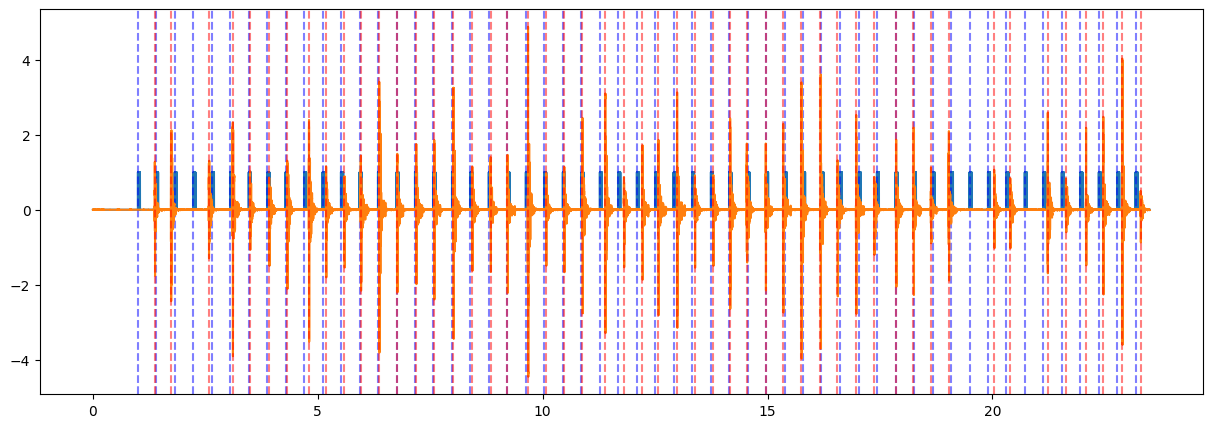

In [5]:
# %%
def extract_onset_time(data, coumn_name, threshold=0.1, minimal_interval=1000):
    """
    Extract the onset time from the data.

    Parameters:
    - data (pd.DataFrame): Data with the time series.
    - column_name (str): Column name of the time series.
    - threshold (float): Threshold value for the onset detection.
    - minimal_interval (int): Minimal interval between two onsets.

    Returns:
    - np.array: Array with the onset times.
    """
    onsets, onset_idx = onset_detection(data[coumn_name], threshold=threshold, minimal_interval=minimal_interval)
    onset_time = data['Time'][onset_idx].values
    return onset_time

target_onset_time = extract_onset_time(data, 'Hi-hat', threshold=0.1, minimal_interval=1000)

reference_onset_time = extract_onset_time(data, 'Hi-hat (cue)', threshold=0.1, minimal_interval=1000)


# plot reference raw data
plt.figure(figsize=(15, 5))
plt.plot(data['Time'], data['Hi-hat (cue)'], label='Hi-hat (cue)')

# plot reference onset use vertical line
for i in range(len(reference_onset_time)):
    plt.axvline(x=reference_onset_time[i], color='blue', linestyle='--', alpha=0.5)

# plot target raw data
plt.plot(data['Time'], data['Hi-hat'], label='Hi-hat')

# plot target onset use vertical line
for i in range(len(target_onset_time)):
    plt.axvline(x=target_onset_time[i], color='red', linestyle='--', alpha=0.5)
    


# for each onset time, find the nearest onset time in the reference onset time.


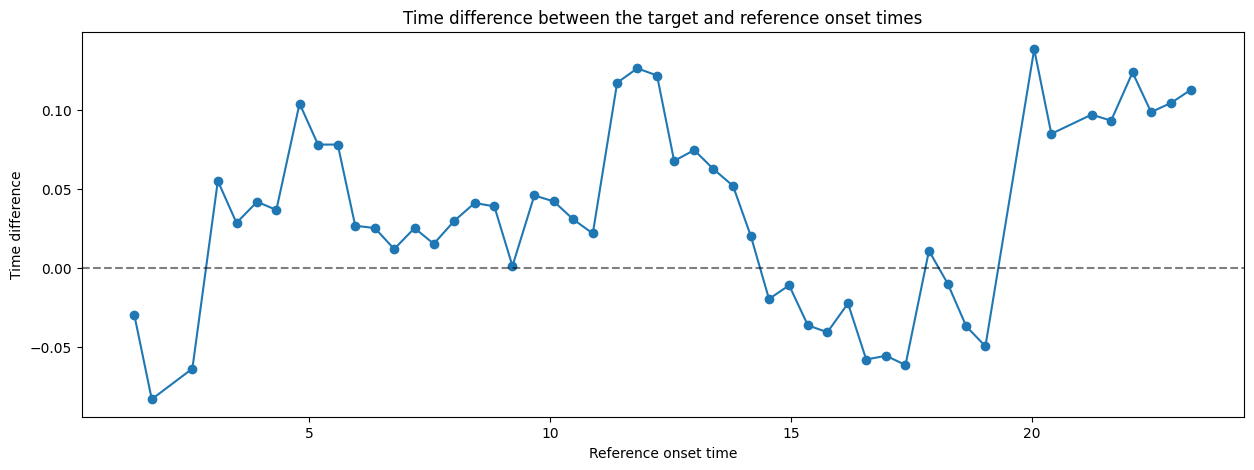

In [6]:
def find_nearest_onset_time(target_onset_time, reference_onset_time):
    """
    Find the nearest onset time in the reference onset time for each target onset time. Return the nearest onset time and the corresponding time difference.

    Parameters:
    - target_onset_time (np.array): Array with the target onset times.
    - reference_onset_time (np.array): Array with the reference onset times.

    Returns:
    - np.array: Array with the nearest onset times.
    - np.array: Array with the time differences.
    """
    nearest_onset_time = []
    time_difference = []

    for target_time in target_onset_time:
        nearest_time = reference_onset_time[np.argmin(np.abs(reference_onset_time - target_time))]
        nearest_onset_time.append(nearest_time)
        time_difference.append(target_time - nearest_time)

    return np.array(nearest_onset_time), np.array(time_difference)

nearest_onset_time, time_difference = find_nearest_onset_time(target_onset_time, reference_onset_time)


# %% plot onset time difference
plt.figure(figsize=(15, 5))
plt.plot(target_onset_time, time_difference, '-o')
plt.xlabel("Reference onset time")
plt.ylabel("Time difference")
plt.title("Time difference between the target and reference onset times")
# add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
